# Study of annual comparison Notebook

## Objectives
- Answer Business Requirements 2
- To prove for client that as the exchange rate rises, the difference between the opening and closing value will be smaller than with a lower exchange rate.

## Input
- Jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv

## Output
- Generate codes that answer the Business Requirement 2.

# Change the working directory

### Import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
current_dir = os.getcwd()
current_dir

'/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print()

Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/fifth-milestone-project-bitcoin'

# Load data

In [6]:
import pandas as pd
df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
df.head(2787)

,Unnamed: 0,Date,Closing Price (USD),24h Open (USD)
0,0,2014-03-14,124.654990,125.304660
1,1,2014-03-15,126.455000,124.654990
2,2,2014-03-16,109.584830,126.455000
3,3,2014-03-17,119.674660,109.584830
4,4,2014-03-18,122.338660,119.674660
...,...,...,...,...
2782,2782,2021-10-25,49765.132082,49597.778891
2783,2783,2021-10-26,50033.693137,49718.354353
2784,2784,2021-10-27,47886.625255,49927.035067
2785,2785,2021-10-28,45605.615754,46806.537852


# Data filter for Business Requirement 2

I filter the data of opening and closing exchange rate for 1st January, 30th June and 31st December

In [40]:
import pandas as pd
df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
usecols=range(2,4)

newdf = df[df['Date'].str.contains('2014-03-14|01-01|06-30|12-31|2021-10-29')]
newdf.head(25)

,Unnamed: 0,Date,Closing Price (USD),24h Open (USD)
0,0,2014-03-14,124.654990,125.304660
108,108,2014-06-30,843.191730,875.074160
292,292,2014-12-31,624.006250,624.996250
293,293,2015-01-01,618.961240,624.006250
473,473,2015-06-30,210.165500,221.574500
657,657,2015-12-31,275.283870,276.306870
658,658,2016-01-01,280.459250,275.283870
839,839,2016-06-30,381.817000,384.138000
1023,1023,2016-12-31,674.008000,674.832000
1024,1024,2017-01-01,663.034000,674.008000


# Correlation study

Use correlation method of spearman and pearson and investigate the correlations

In [41]:
import pandas as pd
from scipy.stats import pearsonr

df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
usecols=range(2,4)

newdf = df[df['Date'].str.contains('2014-03-14|01-01|06-30|12-31|2021-10-29')]

x = newdf['Closing Price (USD)']
y = newdf['24h Open (USD)']
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)



Pearsons correlation: 0.999


In [42]:
import pandas as pd
from scipy.stats import spearmanr

df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
usecols=range(2,4)

newdf = df[df['Date'].str.contains('2014-03-14|01-01|06-30|12-31|2021-10-29')]

x = newdf['Closing Price (USD)']
y = newdf['24h Open (USD)']
corr, _ = spearmanr(x, y)
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.993


In [52]:
vars_to_study = ['Date', 'Closing price (USD)', '24h open (USD)']
vars_to_study

['Date', 'Closing price (USD)', '24h open (USD)']

# EDA on selected variables

In [54]:
import pandas as pd
vars_to_study = ['Date', 'Closing Price (USD)', '24h Open (USD)']
newdf = df[df['Date'].str.contains('2014-03-14|01-01|06-30|12-31|2021-10-29')]

newdf_eda = newdf.filter(vars_to_study)
newdf_eda.head(25)

,Date,Closing Price (USD),24h Open (USD)
0,2014-03-14,124.654990,125.304660
108,2014-06-30,843.191730,875.074160
292,2014-12-31,624.006250,624.996250
293,2015-01-01,618.961240,624.006250
473,2015-06-30,210.165500,221.574500
657,2015-12-31,275.283870,276.306870
658,2016-01-01,280.459250,275.283870
839,2016-06-30,381.817000,384.138000
1023,2016-12-31,674.008000,674.832000
1024,2017-01-01,663.034000,674.008000


# Variables distribution by Annual Comparison

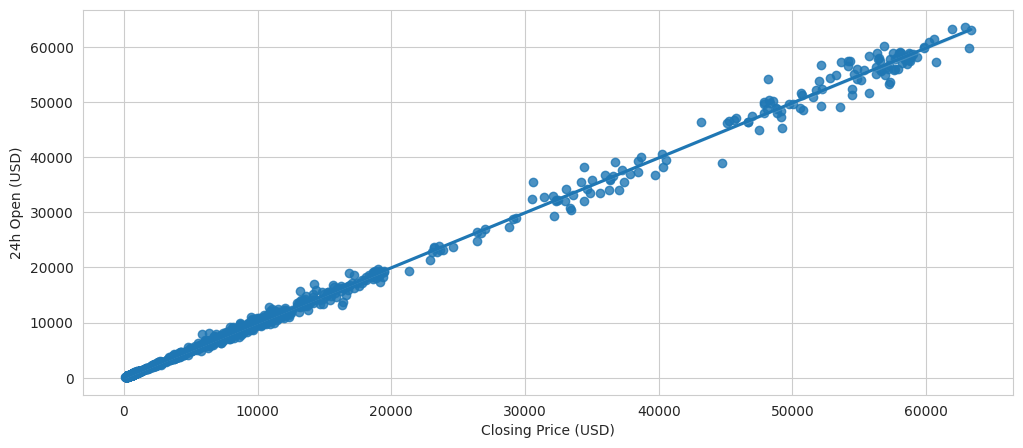

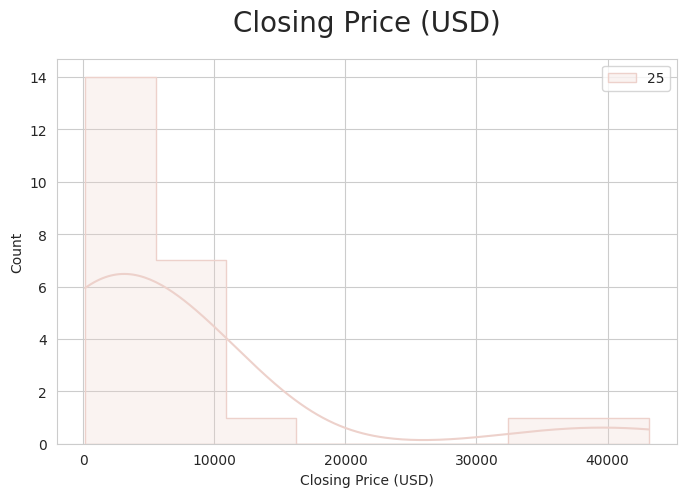

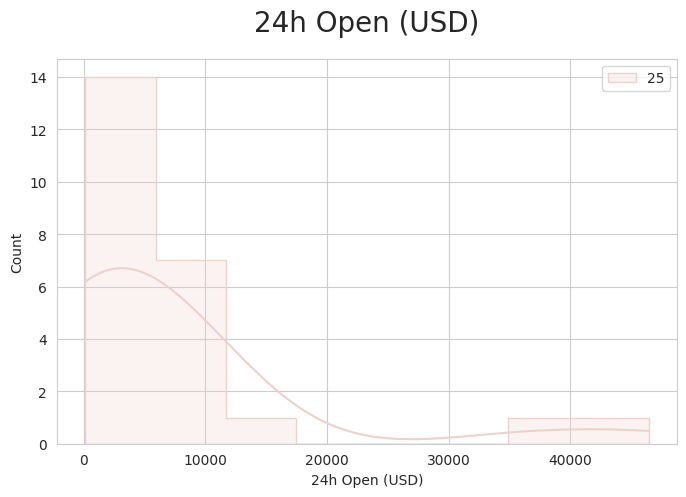

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
vars_to_study = ['Date', 'Closing Price (USD)', '24h Open (USD)']
newdf = df[df['Date'].str.contains('2014-03-14|01-01|06-30|12-31|2021-10-29')]
newdf_eda = newdf.filter(vars_to_study)
def plot_numerical(newdf, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=newdf, x=col, hue=25, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

def plot_categorical():

    plt.figure(figsize=(12, 5))
    sns.regplot(x=df["Closing Price (USD)"], y=df["24h Open (USD)"])
    plt.show()

    
    
target_var = ['Date', 'Closing Price (USD)','24h Open (USD)']
for col in vars_to_study:
    
    if newdf_eda[col].dtype == 'float64':
        plot_numerical(newdf_eda, col, target_var)
        print()
    else:
        plot_categorical()
        print()

# Conclusions